# ADM Homework 2

#### Libraries used

In [1]:
import pandas as pd
#import importlib
#importlib.reload(functions)
import functions
# For RQ1, RQ3, CRQ1 
import matplotlib.pyplot as plt
#CRQ2
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Arc
# For RQ3
import numpy as np

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
# For RQ3
from collections import defaultdict
from datetime import datetime
from datetime import date

## (1) We import the datasets we need

In [101]:
team = pd.read_json(r"teams.json")
coach=pd.read_json(r"coaches.json")
player= pd.read_json(r"players.json")

In [5]:
event_Spain=pd.read_json(r"events_Spain.json")

In [6]:
event_England=pd.read_json(r"events_England.json")

In [7]:
match_England=pd.read_json(r"matches_England.json")
match_Spain=pd.read_json(r"matches_Spain.json")

In [8]:
match_Italy = pd.read_json(r"matches_Italy.json")

In [ ]:
event_Italy = pd.read_json(r"events_Italy.json")

## (2) We clean a bit the dataset of the Event in England 

In [9]:
event_England= functions.CleanEngEvents(event_England)

#### Exctracting the postition columns and the positions and tags, and separate their elements 

#### In here we create the lists of the staerting and enging posisions (for CRQ2) and the lists of the tags refered to each event (very usefull to filter events given a tag)

In [10]:
#this is what we get
event_England

,eventId,subEventName,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,startPosX,startPosY,endPosX,endPosY,tagsStr,tagsList,eventMin
0,8,Simple pass,25413,2499719,Pass,1609,1H,2.758649,85,177959171,49,49,31,78,S1801E,[1801],0.0
1,8,High pass,370224,2499719,Pass,1609,1H,4.946850,83,177959172,31,78,51,75,S1801E,[1801],0.0
2,8,Head pass,3319,2499719,Pass,1609,1H,6.542188,82,177959173,51,75,35,71,S1801E,[1801],0.0
3,8,Head pass,120339,2499719,Pass,1609,1H,8.143395,82,177959174,35,71,41,95,S1801E,[1801],0.0
4,8,Simple pass,167145,2499719,Pass,1609,1H,10.302366,85,177959175,41,95,72,88,S1801E,[1801],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,0,2500098,Interruption,1623,2H,2796.732525,50,251596409,0,32,100,100,,[],46.0
643146,3,Corner,70965,2500098,Free Kick,1633,2H,2829.821084,30,251596232,100,100,88,47,"S302E,S801E,S1801E","[302, 801, 1801]",47.0
643147,1,Air duel,7919,2500098,Duel,1623,2H,2831.211419,10,251596410,12,53,14,50,"S701E,S1802E","[701, 1802]",47.0
643148,1,Air duel,8005,2500098,Duel,1633,2H,2832.434399,10,251596234,88,47,86,50,"S703E,S1801E","[703, 1801]",47.0


## (3) We create a dataframe (engTeams) of teams who actually played in the Premier Legue, and a list of only the teamId of those teams.

#### We create these because they are usefull to see all the info concerning a English team all together

In [11]:
engTeams = {} #a dict
eng=[]
for i in range(len(team)):
    if (team["area"][i]["id"] == '0' and team['type'][i] == "club"):
        eng.append(team['wyId'][i])
        engTeams[team['wyId'][i]] = { 'name': team.name[i], 'officialName': team.officialName[i], 'country': team.area[i]['name'] }


## (4) We create a dataset of ONLY english players, who actually played in the Premier Legue.

In [12]:
# We filter all the players on only those whose teamId is in the list of the english teams Id
eng_players = player.loc[player['currentTeamId'].isin(eng)]

In [13]:
#We can drop the non-important colums
eng_players = eng_players.drop(columns =["passportArea", "weight", "birthDate", "role", "birthArea", "shortName", "currentNationalTeamId", 'foot'])

eng_players.rename(columns={"wyId": "playerId"}, inplace= True)

# reindexing
pd.DataFrame.reset_index(eng_players, inplace= True)
eng_players.drop(columns=["index"], inplace= True)

## We clean Matches England

In [14]:
Match_England= match_England.copy()

In [15]:
match_England= functions.cleaningMatches(match_England)

# [RQ1]

## Who wants to a champion?

#### We sort the dataset on the gameweek (not necessary)

In [16]:
DF= match_England.copy()

#### We create a dict whose keys are the TeamId (England and Wales teams (they both have area id= 0) excluding the national teams), and for every key the values are a list of 39 zeros (1 for every week, starting from the week 0). This dict will be updated with the right week-score and will become the dataset of all the scores

In [17]:
engTableNGW = {}
for i in range(len(team["area"])):
        if (team["area"][i]["id"] == "0" and team['type'][i]== "club"):
            engTableNGW[team['wyId'][i]]= [0 for i in range(39)]

In [18]:
scores= functions.CountingPoints(DF, engTableNGW)

In [19]:
scores

,gameweek,1613,1673,10531,1659,1651,1646,1631,1633,1639,...,1623,1627,1625,1624,1628,1619,1612,1610,1611,1609
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,1,0,0,3,0,0,0,...,3,3,3,3,0,1,1,0,3,3
2,2,0,6,1,0,0,3,3,0,3,...,4,6,4,3,0,4,4,3,6,3
3,3,3,7,4,0,1,4,3,0,4,...,4,7,7,4,0,5,7,6,9,3
4,4,6,7,4,0,4,7,3,3,5,...,4,7,10,7,0,5,7,9,10,6
5,5,9,8,5,3,4,8,4,4,5,...,4,8,13,8,0,8,8,10,13,7
6,6,9,9,5,3,7,9,4,4,5,...,7,8,16,11,0,8,11,13,16,10
7,7,10,9,5,4,7,12,5,7,8,...,7,9,19,14,0,8,12,13,19,13
8,8,11,9,8,4,8,13,6,8,8,...,8,10,22,17,3,9,13,13,20,13
9,9,14,12,8,7,11,13,9,8,8,...,8,10,25,20,3,12,13,16,20,16


#### Here we rename all the columns with the corresponding Team name (instead of the Team Id)

In [20]:
for col in list(scores.drop(columns={'gameweek'}).columns):
    scores.rename( columns = {col: engTeams[col]['name']}, inplace = True)

#### The plot

Text(0, 0.5, 'Points')

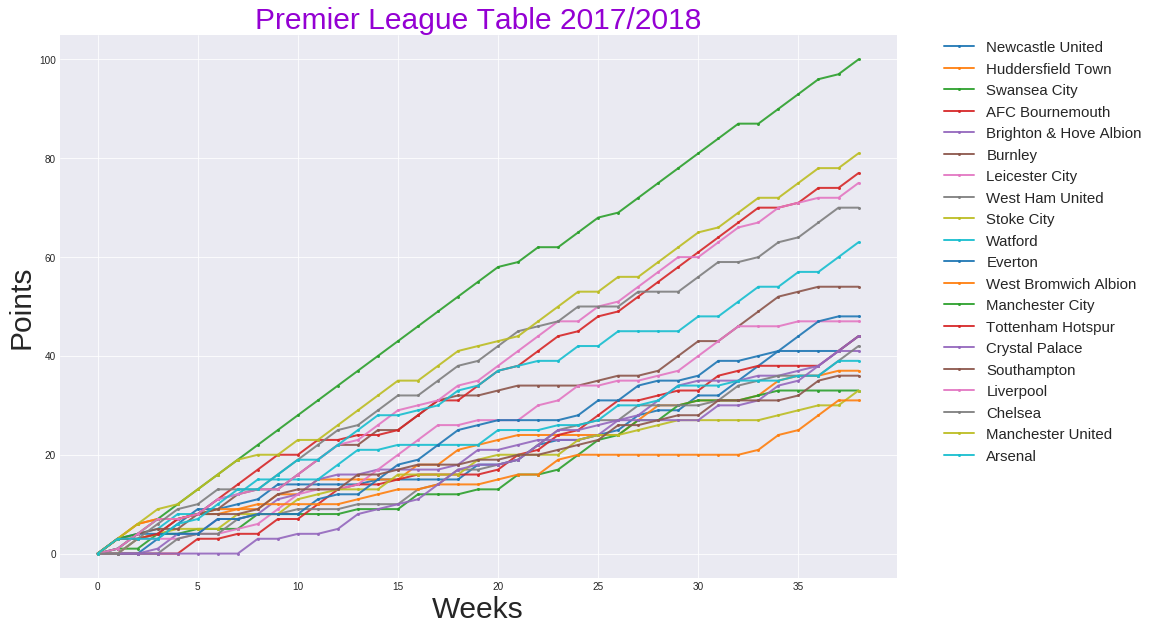

In [21]:
plt.style.use('seaborn-darkgrid') #style used

#size of the figure
plt.figure(figsize=(15,10)) 

# multiple line plot
num=0 
for column in scores.drop('gameweek', axis=1):
    num+=1
    plt.plot(scores['gameweek'], scores[column], linewidth = 2, marker = "o", markersize = 2, alpha = 0.9, label = column)

# the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,frameon = False, prop={'size': 15})

# Add titles
plt.title("Premier League Table 2017/2018", loc = 'center', fontsize = 30, fontweight = 3, color = 'darkviolet')
plt.xlabel("Weeks", fontsize = 30)
plt.ylabel("Points", fontsize = 30)

# [RQ2]

### Is there a home-field advantage? 

In [22]:
teams=functions.cleaningTeams(team)
matches_England= match_England.copy()
events_England= event_England.copy()
players=functions.cleaningPlayers(player)
coaches= coach.copy()

In [23]:
events_Spain = functions.CleanEngEvents(event_Spain)

In [24]:
matches_Spain= functions.cleaningMatches(match_Spain)

## TABLE

In [25]:
tableEng = functions.creatingTable(teams, matches_England)

In [26]:
tableEsp = functions.creatingTable(teams, matches_Spain)

In [27]:
tableEng

,teamId,name,totalWin,totalDraw,totalLoss,homeWin,homeDraw,homeLoss,awayWin,awayDraw,awayLoss,homePoints,awayPoints,totalPoints
0,1625,Manchester City,32,4,2,16,2,1,16,2,1,50,50,100
1,1611,Manchester United,25,6,7,15,2,2,10,4,5,47,34,81
2,1624,Tottenham Hotspur,23,8,7,13,4,2,10,4,5,43,34,77
3,1612,Liverpool,21,12,5,12,7,0,9,5,5,43,32,75
4,1610,Chelsea,21,7,10,11,4,4,10,3,6,37,33,70
5,1609,Arsenal,19,6,13,15,2,2,4,4,11,47,16,63
6,1646,Burnley,14,12,12,7,5,7,7,7,5,26,28,54
7,1623,Everton,13,10,15,10,4,5,3,6,10,34,15,49
8,1631,Leicester City,12,11,15,7,6,6,5,5,9,27,20,47
9,1628,Crystal Palace,11,11,16,7,5,7,4,6,9,26,18,44


## Contingency Tables

We are going to create 5 contingency tables for the weakest teams of the championship, picking the five teams from the bottom. We are going to aggregate the contingency tables calculated. We have removed the matches that those teams played among themselves: in this way we remove every grade on dependency within the sampled date. The obtained table is the final contengecy table which will be used for performing the Chi-squared test ('overall test'). 

In [28]:
dictTeams1 = {'Huddersfield Town': 1673,'Southampton': 1619,'Stoke City': 1639,'Swansea City': 10531,'West Bromwich Albion': 1627 }

In [29]:
dictTeams2 = {'Manchester City': 1625,'Watford': 1644,'Southampton': 1619,'Chelsea': 1610,'Arsenal': 1609 }

In [30]:
pd.DataFrame(pd.Series(dictTeams1))

,0
Huddersfield Town,1673
Southampton,1619
Stoke City,1639
Swansea City,10531
West Bromwich Albion,1627


In [31]:
teamsList = []
for key,value in dictTeams2.items():
        teamsList.append(value) 

In [32]:
teamsList

[1625, 1644, 1619, 1610, 1609]

In [33]:
functions.singleContingencyTable(1673, tableEng)

,teamId,name,win,draw,loss,typeVenue
15,1673,Huddersfield Town,6,5,8,home
15,1673,Huddersfield Town,3,5,11,away


In [34]:
teams[teams.teamId.isin(teamsList) ][['name', 'teamId']]

,name,teamId
60,Watford,1644
67,Manchester City,1625
75,Southampton,1619
78,Chelsea,1610
84,Arsenal,1609


In [35]:
def subTable(tmLst):
    # This function creates a table within a selected numbers of teams, just considering the matches between thierselves.
    # INPUT: Array of teamIds
    # OUTPUT: Teams Ranking

    # Filter on the matches between the teams
    strCond = ""

    for el in tmLst:
        strCond = strCond +"| (matches_England.homeTeamId == " + str(el) + ") "
    strCond = strCond[2:-1]

    exec( 'global subTableMatches; subTableMatches = matches_England[ ('+ strCond +') & (matches_England.awayTeamId.isin(tmLst))]' )

    # Creating SUB TABLE between the teams
    # Retrieving Home/Away Statistics & Points
    homeMatches = pd.merge(teams.filter(['name', 'teamId', 'championshipId']), subTableMatches, left_on='teamId', right_on='homeTeamId', how='inner')
    awayMatches = pd.merge(teams.filter(['name', 'teamId', 'championshipId']), subTableMatches, left_on='teamId', right_on='awayTeamId', how='inner')
    hm = homeMatches[['teamId', 'name','homeWin','homeDraw','homeLoss','homePoints' ]].groupby(['teamId','name']).sum()
    am = awayMatches[['teamId', 'name','awayWin','awayDraw','awayLoss','awayPoints' ]].groupby(['teamId','name']).sum()

    # The Final Sub Table
    subTable = pd.merge(hm, am, on='teamId' )

    # Calculating Total Points
    subTable['totalPoints'] = subTable['homePoints'] + subTable['awayPoints']
    subTable['totalWin']    = subTable['homeWin']    + subTable['awayWin']
    subTable['totalDraw']   = subTable['homeDraw']   + subTable['awayDraw']
    subTable['totalLoss']   = subTable['homeLoss']   + subTable['awayLoss']

    # Joining teams' names
    subTable = pd.merge(teams, subTable, left_on='teamId', right_on='teamId', how='inner')[['teamId','name','totalWin','totalDraw','totalLoss','homeWin','homeDraw','homeLoss','awayWin','awayDraw','awayLoss','homePoints','awayPoints','totalPoints']]

    # Sorting the table
    subTable.sort_values("totalPoints", ascending=False, inplace=True)

    #Reindexing
    subTable.reset_index(inplace=True)

    #Dropping columns
    subTable.drop(columns=['index'], inplace=True)

    return subTable


In [36]:
def contingencyTable(tmLst, table):
    # This function creates the contingency table for Chii-Squared test within a selected numbers of teams.
    # It doesn't tanke in consideration the matches between the teams involved in the test.
    # INPUT: Array of teamIds, Teams Ranking of the set of teams
    # OUTPUT: Chi-Squared Contingency Table
    totTable = [ [0,0,0],[0,0,0] ]
    intTable = [ [0,0,0],[0,0,0] ] #Intersection Table: matches between the teams in tmLst
    ctTable  = [ [0,0,0],[0,0,0] ] #Contingency Table: we will use this for the test

    # Global Statistics
    for tm in tmLst:
        tb = functions.singleContingencyTable(tm, table)
        tb.reset_index(inplace=True)
        totTable[0][0] = totTable[0][0] + tb[tb['typeVenue'] == 'home']['win'].loc[0]
        totTable[0][1] = totTable[0][1] + tb[tb['typeVenue'] == 'home']['draw'].loc[0]
        totTable[0][2] = totTable[0][2] + tb[tb['typeVenue'] == 'home']['loss'].loc[0]
        totTable[1][0] = totTable[1][0] + tb[tb['typeVenue'] == 'away']['win'].loc[1]
        totTable[1][1] = totTable[1][1] + tb[tb['typeVenue'] == 'away']['draw'].loc[1]
        totTable[1][2] = totTable[1][2] + tb[tb['typeVenue'] == 'away']['loss'].loc[1]

    # Intra Statistics: matches between the teams in tmLst
    subsetTable = subTable(tmLst) # The table intra the teams selected
    for tm in tmLst:
        tb = functions.singleContingencyTable(tm, subsetTable)
        tb.reset_index(inplace=True)
        intTable[0][0] = intTable[0][0] + tb[tb['typeVenue'] == 'home']['win'].loc[0]
        intTable[0][1] = intTable[0][1] + tb[tb['typeVenue'] == 'home']['draw'].loc[0]
        intTable[0][2] = intTable[0][2] + tb[tb['typeVenue'] == 'home']['loss'].loc[0]
        intTable[1][0] = intTable[1][0] + tb[tb['typeVenue'] == 'away']['win'].loc[1]
        intTable[1][1] = intTable[1][1] + tb[tb['typeVenue'] == 'away']['draw'].loc[1]
        intTable[1][2] = intTable[1][2] + tb[tb['typeVenue'] == 'away']['loss'].loc[1]

    # Matches of selected teams against other teams of the championship
    for i in range(0,2):
        for j in range(0,3):
            ctTable[i][j] = totTable[i][j] - intTable[i][j]

    return ctTable


In [37]:
subTable(teamsList)

,teamId,name,totalWin,totalDraw,totalLoss,homeWin,homeDraw,homeLoss,awayWin,awayDraw,awayLoss,homePoints,awayPoints,totalPoints
0,1625,Manchester City,8,0,0,4,0,0,4,0,0,12,12,24
1,1610,Chelsea,3,2,3,2,1,1,1,1,2,7,4,11
2,1644,Watford,3,1,4,2,1,1,1,0,3,7,3,10
3,1609,Arsenal,2,3,3,2,1,1,0,2,2,7,2,9
4,1619,Southampton,0,2,6,0,1,3,0,1,3,1,1,2


In [38]:
functions.singleContingencyTable(1609, subTable(teamsList))

,teamId,name,win,draw,loss,typeVenue
3,1609,Arsenal,2,1,1,home
3,1609,Arsenal,0,2,2,away


In [39]:
ct = contingencyTable(teamsList, tableEng)

In [40]:
ct

[[43, 17, 15], [31, 15, 29]]

## Pearson’s Chi-Squared Test
The Chi-Squared test is a **statistical hypothesis test** that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X).

Given a random variable, shareable in groups, the number of observations for a category (such as male and female) may or may not the same. We can calculate the expected frequency of observations in each Interest group and see whether the partitioning of interests by the category results in similar or different frequencies.

The Chi-Squared test does this for a **contingency table**, first calculating the expected frequencies for the groups, then determining whether the division of the groups, called the observed frequencies, matches the expected frequencies.

The result of the test is a **test statistic** that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.

When observed frequency is far from the expected frequency, the corresponding term in the sum is large; when the two are close, this term is small. Large values of X^2 indicate that observed and expected frequencies are far apart. Small values of X^2 mean the opposite: observeds are close to expecteds. So X^2 does give a measure of the distance between observed and expected frequencies.

The variables are considered independent if the observed and expected frequencies are similar, that the levels of the variables do not interact, are not dependent.

The chi-square test of independence works by comparing the categorically coded data that you have collected (known as the observed frequencies) with the frequencies that you would expect to get in each cell of a table by chance alone (known as the expected frequencies).

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

 - If **Statistic >= Critical Value**: significant result, reject null hypothesis (H0), dependent.
 - If **Statistic < Critical Value**: not significant result, fail to reject null hypothesis (H0), independent.

The *degrees of freedom* for the chi-squared distribution is calculated based on the size of the contingency table as (rows - 1) * (cols - 1).

In terms of a **p-value** and a chosen significance level **alpha**, the test can be interpreted as follows:

 - If **p-value <= alpha**: significant result, reject null hypothesis (H0), dependent.
 - If **p-value > alpha**: not significant result, fail to reject null hypothesis (H0), independent.
 
For the test to be effective, at *least five observations are required in each cell of the contingency table*.

Next, let’s look at how we can calculate the chi-squared test.

Source: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [41]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

The Pearson’s chi-squared test for independence can be calculated in Python using the *chi2_contingency()* *SciPy* function.

The function takes an array as input representing the contingency table for the two categorical variables. It returns the calculated statistic and p-value for interpretation as well as the calculated degrees of freedom and table of expected frequencies.

In [42]:
stat, p, dof, expected = chi2_contingency(ct)

In [43]:
stat, p, dof, expected

(6.525491400491401, 0.03828313955390547, 2, array([[37., 16., 22.],
        [37., 16., 22.]]))

## Hypothesis
For our test, we chose the followings hypothesis:
 - **H0**: E[x] = m_i  for each group i, which means that there is no home-field advantage whitin the data we have observed.
 - **H1**: E[x] != m_i  for at least one group i, which means that we are going to refuse H0 null Hypothesis and a home-field advantage is present whitin the data collected.
 
We can follow 2 way, each way will lead to the same result:

### Percentiles Approach
We can interpret the statistic by retrieving the critical value from the chi-squared distribution for the probability and number of degrees of freedom.

We choose a probability of 95%, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent. If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.

In [44]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [45]:
print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))

probability = 0.950, critical = 5.991, stat = 6.525


With this approach, we see that we accept the null hypothesis H0: all the values belong to the same population, i.e. there is any kind of home-field advantage.

### P-Value Approach
We can also interpret the p-value by comparing it to a chosen significance level, which would be 5%, calculated by inverting the 95% probability used in the critical value interpretation:

In [46]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [47]:
print('significance = %.3f, p= %.3f' % (alpha, p))

significance = 0.050, p= 0.038


The result of this approach is the same of the percentiles: we accept the null hypothesis H0, which menas that all the values belong to the same population, i.e. there is any kind of home-field advantage. This phenomenon is not present within the selected five teams: 'Huddersfield Town': 1673, 'Southampton': 1619, 'Stoke City': 1639, 'Swansea City': 10531 e 'West Bromwich Albion': 1627. We cannot generalize this statistic just with just one test.

## Iteration of Chi-Squared Test

We are going to replicate the test several times (n = 1000), picking randomly each time a subset of five teams. For this purpouse we have created the function pickingTeams.

In [48]:
picked = teams[teams.championshipId == 380].sample(n=5, frac=None, replace=False, weights=None, random_state=None, axis=None)

In [49]:
picked

,city,name,teamId,officialName,type,areaName,championshipId,areaCode
90,Crotone,Crotone,3197,FC Crotone,club,Italy,380,ITA
36,Torino,Juventus,3159,Juventus FC,club,Italy,380,ITA
57,Benevento,Benevento,3219,Benevento Calcio,club,Italy,380,ITA
47,Bologna,Bologna,3166,Bologna FC 1909,club,Italy,380,ITA
38,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,club,Italy,380,ITA


In [50]:
dictTeams = { }
for i in range(len(picked)):
    # Adding a new key value pair
    dictTeams.update( {picked.iloc[i]['name'] : picked.iloc[i]['teamId']} )

In [51]:
dictTeams

{'Crotone': 3197,
 'Juventus': 3159,
 'Benevento': 3219,
 'Bologna': 3166,
 'Sassuolo': 3315}

In [52]:
dictTeams.items()

dict_items([('Crotone', 3197), ('Juventus', 3159), ('Benevento', 3219), ('Bologna', 3166), ('Sassuolo', 3315)])

In [53]:
teamsList = []
for key,value in dictTeams.items():
        teamsList.append(value)

In [54]:
# type: it's the type of the team ('club' or 'national')
def pickingTeams(teams, teamType, championshipId, n_sample):
    dictTeams = { }
    teamsList = []
    picked = teams[ (teams.championshipId == championshipId) & (teams.type == teamType) ].sample(n=n_sample)

    for i in range(len(picked)):
        dictTeams.update( {picked.iloc[i]['name'] : picked.iloc[i]['teamId']} )

    for key,value in dictTeams.items():
            teamsList.append(value)
            
    return teamsList

## The Overall Test

In [55]:
def homeFieldAdvantageTest(n, championshipId, teams, teamType, table, n_sample, significance):
    countRejectH0 = 0
    countAcceptH0 = 0

    for i in range(n):
        lstTms = pickingTeams(teams, teamType, championshipId, n_sample)

        ctab = contingencyTable(lstTms, table)

        stat, p, dof, expected = chi2_contingency(ctab)

        # interpret p-value
        if p <= significance: countRejectH0 += 1
        else: countAcceptH0 += 1
    
    testOutcome = 'Percentage of rejections of H0  = %.3f\nPercentage of failing into reject of H0  = %.3f'
    return print(testOutcome % (countRejectH0/n, countAcceptH0/n))

In [56]:
homeFieldAdvantageTest(1000, 0, teams, 'club', tableEng, 5, 0.07)

Percentage of rejections of H0  = 0.706
Percentage of failing into reject of H0  = 0.294


Assuming the null hypothesis H0 that there is no home-field advantage, within a simulation of 1000 times we see that **we reject H0 the 68% of the times**. In the Chi-Squared test processed we have relaxed the significance at the 7%, in this way we include in the rejection of H0 values which are close to the significance value of 5%.
**We can conclude that there is a home-field advantage** within the matches analyzed.

# [RQ3]

### Which teams have the youngest coaches?

#### We need just name and wyId columns of teams in further commands

In [103]:
teamss = team[["name","wyId"]]
teamss

,name,wyId
0,Newcastle United,1613
1,Celta de Vigo,692
2,Espanyol,691
3,Deportivo Alav\u00e9s,696
4,Levante,695
...,...,...
137,Spain,1598
138,Serbia,17322
139,Switzerland,6697
140,Poland,13869


#### By setting the wyId for index, it is easier to search with IDs

In [104]:
coach.set_index("wyId",inplace=True)

In [105]:
coach.head()

,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
wyId,,,,,,,,
275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0


#### We have some coaches that their currentTeamIds are 0, so we should search in matches(England) -> TeamId -> coachId 
#### In order to find the teams with the coaches they had during the season

#### Here we define 2 default dictionaries to fill with coachIds

In [106]:
coachesdic = defaultdict(lambda: [])
coachesdic2 = defaultdict(lambda: [])
coachData = dict(Match_England["teamsData"])
for key,value in coachData.items():
    alpha = value
    for key,value in alpha.items():
        coachesdic[key].append(value["coachId"]) 

#### So we have a dict (coachesdic) which shows the coachIds for every weeks of matches of a specific team during the season

In [107]:
for key,value in coachesdic.items():
    alpha = set(value)
    value = list(alpha)
    value = [i for i in value if i != 0] 
    coachesdic2[key].append(value)

#### Here we have English teamIds with the unique coachIds during the season (coachesdic2)

#### And we dataframe the coachesdic2 and name the column CID(Coaches' Ids for each team)

In [108]:
df = pd.DataFrame(coachesdic2)
df_coach = df.T

df_coach.columns = ["CID"]

df_coach.head()

,CID
1646,[8880]
1659,[8934]
1628,"[8357, 268775]"
1627,"[149026, 7973, 9454]"
1609,[7845]


#### So then we should choose the youngest coach for each team that had more than one coach

#### For this, we use another defaultdic (age) for choosing the youngest one by their birthdate.
#### But there was a problem with datasets: in a few weeks of the matches, one team had got a coach with id = 3782, and coachid= 3782 were not in coaches datasets, so we had to use exceptions.

In [109]:
age = defaultdict(lambda:[])
for i in range(20):
    for j in range(len(df_coach["CID"][i])):
        try:
            age[df_coach.index[i]].append(coach["birthDate"][df_coach["CID"][i][j]])
        except:
            pass  

In [110]:
df_coach.reset_index(inplace=True)

#### Here we comparing the coach's birthDates with sorting them in a dataframe and picking the last row and append them in a list. 
#### Then adding a new column with the lists that shows the index of the youngest one.

In [111]:
lis = []
for k,v in age.items():
    if k:
        dfk = pd.DataFrame(v,index=[i for i in range(len(v))])
        dfk.sort_values(0,inplace=True)
        young = dfk[0][-1:]
        answer = int(str(young).split()[0])
        lis.append(answer)

In [112]:
df_coach["Yind"] = lis

#### Renaming the columns...

In [113]:
df_coach.columns = ["teamid","coachid","Yind"]

#### As said before there is no coachId with id=3782 so we change the index of "Yind" where we have 3782

In [114]:
df_coach["Yind"][17] = "1"

/home/flaminia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_coach["Yind"][17]

1

#### And in lis2 we have all the youngest one's birthdays and add them in a new col. in df_coach

In [116]:
lis2 = []
for i in range(len(df_coach)):
        lis2.append(coach["birthDate"][df_coach["coachid"][i][df_coach["Yind"][i]]])

In [117]:
df_coach["birthDate"] = lis2

#### Then we change the coachid column with lis3(inorder to have the unique coachid)

In [118]:
lis3 = []
for i in range(len(df_coach)):
        lis3.append(df_coach["coachid"][i][df_coach["Yind"][i]])
        

In [119]:
df_coach.drop("coachid",axis=1,inplace=True)
df_coach["coachid"] = lis3

#### Also we no more need the "Yind" column

In [120]:
df_coach.drop("Yind",axis=1,inplace=True)

In [121]:
Eng = pd.DataFrame(eng)

In [123]:
Eng.columns = ["teamid"]

#### And merge it with teams to have the teamId and their name(Only the English ones)

In [125]:
Eng = pd.merge(Eng,teamss,left_on="teamid",right_on="wyId")

In [126]:
Eng

,teamid,name,wyId
0,1613,Newcastle United,1613
1,1673,Huddersfield Town,1673
2,10531,Swansea City,10531
3,1659,AFC Bournemouth,1659
4,1651,Brighton & Hove Albion,1651
5,1646,Burnley,1646
6,1631,Leicester City,1631
7,1633,West Ham United,1633
8,1639,Stoke City,1639
9,1644,Watford,1644


#### We can drop the wyId because we don't need it

In [128]:
Eng.drop("wyId",axis=1,inplace=True)

In [129]:
Eng.sort_values("teamid") #Not necessary 

,teamid,name
19,1609,Arsenal
17,1610,Chelsea
18,1611,Manchester United
16,1612,Liverpool
0,1613,Newcastle United
15,1619,Southampton
10,1623,Everton
13,1624,Tottenham Hotspur
12,1625,Manchester City
11,1627,West Bromwich Albion


In [130]:
df_coach.sort_values("teamid") #Not necessary 

,teamid,birthDate,coachid
14,10531,1972-01-08,381291
4,1609,1949-10-22,7845
11,1610,1969-07-31,20454
9,1611,1963-01-26,3295
7,1612,1967-06-16,14791
10,1613,1973-02-19,531745
13,1619,1971-10-05,254174
18,1623,1973-10-16,434992
17,1624,1972-03-02,292863
12,1625,1971-01-18,267136


#### We numeric the "teamId" to be merged, so we change it into numeric values

In [131]:
df_coach["teamid"] = pd.to_numeric(df_coach["teamid"])

#### Then we merge df_coach with Eng

In [132]:
df_coach = pd.merge(df_coach ,Eng,left_on="teamid",right_on="teamid")

In [133]:
df_coach.head()

,teamid,birthDate,coachid,name
0,1646,1971-06-28,8880,Burnley
1,1659,1977-11-29,8934,AFC Bournemouth
2,1628,1970-05-15,268775,Crystal Palace
3,1627,1961-07-18,7973,West Bromwich Albion
4,1609,1949-10-22,7845,Arsenal


In [134]:
df_coach.sort_values("birthDate",ascending=False,inplace=True)

#### Now we have a sorted dataframe that the top 10 rows show the youngest coaches

In [135]:
youngestdf = pd.DataFrame
youngestdf = df_coach.iloc[:10]
youngestdf.head()

,teamid,birthDate,coachid,name
1,1659,1977-11-29,8934,AFC Bournemouth
8,1644,1977-07-12,71037,Watford
16,1631,1975-12-04,8214,Leicester City
18,1623,1973-10-16,434992,Everton
10,1613,1973-02-19,531745,Newcastle United


In [136]:
youngestdf = youngestdf[["name","coachid"]]

In [137]:
youngestdf = youngestdf.reset_index()

In [138]:
youngestdf.drop("index", axis=1,inplace=True)

Also we no more need "coachId" column # Not necessary

In [139]:
youngestdf.drop("coachid", axis=1,inplace=True)

### The #10 teams with the youngest coaches


In [140]:
youngestdf

,name
0,AFC Bournemouth
1,Watford
2,Leicester City
3,Everton
4,Newcastle United
5,Tottenham Hotspur
6,Swansea City
7,Huddersfield Town
8,Southampton
9,Burnley


#### Now we calculate the ages and showing the their distribution with Boxplot

In [141]:
df_coach = df_coach.reset_index()

df_coach.drop("index",axis=1,inplace=True)

In [142]:
df_coach.head()

,teamid,birthDate,coachid,name
0,1659,1977-11-29,8934,AFC Bournemouth
1,1644,1977-07-12,71037,Watford
2,1631,1975-12-04,8214,Leicester City
3,1623,1973-10-16,434992,Everton
4,1613,1973-02-19,531745,Newcastle United


In [143]:
coaches = coach.reset_index()

#### Calculating the ages

In [144]:
age = []
for i in range(len(df_coach)):
    born = list(map(int, df_coach.birthDate[i].split("-")))
    today = date.today()
    age.append(today.year - born[0])

df_coach['age'] = age

In [145]:
df_coach.head()

,teamid,birthDate,coachid,name,age
0,1659,1977-11-29,8934,AFC Bournemouth,42
1,1644,1977-07-12,71037,Watford,42
2,1631,1975-12-04,8214,Leicester City,44
3,1623,1973-10-16,434992,Everton,46
4,1613,1973-02-19,531745,Newcastle United,46


#### For boxplot we just need the age col.

In [146]:
dfage = df_coach.drop(["teamid","birthDate","name","coachid"],axis=1)

In [147]:
dfage

,age
0,42
1,42
2,44
3,46
4,46
5,47
6,47
7,48
8,48
9,48


#### And Finally the Boxplot

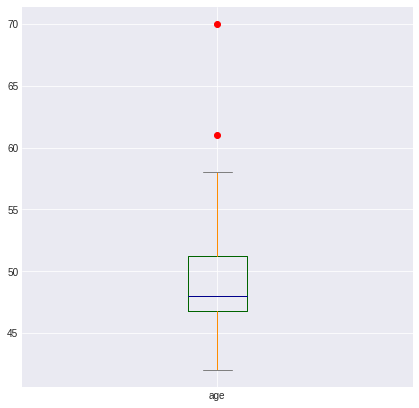

In [148]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
dfage.plot.box(color = color,
              sym='ro', figsize= (7,7))


# [RQ4]

### Find the top 10 players with the highest ratio between completed passes and attempted passes

In [149]:
eng_playersP= eng_players.copy()

#### We add two colums that counts the completed and attempted passes for every player in the Premier Legue. In the beginning the count is initialized at all 0, later, with the dataframe of ONLY passes, we can count.

In [150]:
eng_playersP["completedPasses"]= [0 for _ in range(len(eng_players))]
eng_playersP["AttemptedPasses"]= [0 for _ in range(len(eng_players))]

In [151]:
eng_playersP.head()

,firstName,middleName,lastName,currentTeamId,height,playerId,completedPasses,AttemptedPasses
0,Toby,,Alderweireld,1624,187,36,0,0
1,Jan,,Vertonghen,1624,189,48,0,0
2,Christian,,Dannemann Eriksen,1624,180,54,0,0
3,Johann,,Berg Gu\u00f0munds\u00adson,1646,186,93,0,0
4,Nacer,,Chadli,1627,187,261,0,0


In [152]:
# Only events whose event name is Pass
df_passes = event_England.loc[event_England['eventName']=="Pass"]

df_passes.head()

,eventId,subEventName,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,startPosX,startPosY,endPosX,endPosY,tagsStr,tagsList,eventMin
0,8,Simple pass,25413,2499719,Pass,1609,1H,2.758649,85,177959171,49,49,31,78,S1801E,[1801],0.0
1,8,High pass,370224,2499719,Pass,1609,1H,4.946850,83,177959172,31,78,51,75,S1801E,[1801],0.0
2,8,Head pass,3319,2499719,Pass,1609,1H,6.542188,82,177959173,51,75,35,71,S1801E,[1801],0.0
3,8,Head pass,120339,2499719,Pass,1609,1H,8.143395,82,177959174,35,71,41,95,S1801E,[1801],0.0
4,8,Simple pass,167145,2499719,Pass,1609,1H,10.302366,85,177959175,41,95,72,88,S1801E,[1801],0.0


In [153]:
#to adjust the indexing

pd.DataFrame.reset_index(df_passes, inplace= True)

df_passes.drop(columns=['index'])

,eventId,subEventName,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,startPosX,startPosY,endPosX,endPosY,tagsStr,tagsList,eventMin
0,8,Simple pass,25413,2499719,Pass,1609,1H,2.758649,85,177959171,49,49,31,78,S1801E,[1801],0.0
1,8,High pass,370224,2499719,Pass,1609,1H,4.946850,83,177959172,31,78,51,75,S1801E,[1801],0.0
2,8,Head pass,3319,2499719,Pass,1609,1H,6.542188,82,177959173,51,75,35,71,S1801E,[1801],0.0
3,8,Head pass,120339,2499719,Pass,1609,1H,8.143395,82,177959174,35,71,41,95,S1801E,[1801],0.0
4,8,Simple pass,167145,2499719,Pass,1609,1H,10.302366,85,177959175,41,95,72,88,S1801E,[1801],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328652,8,Simple pass,8313,2500098,Pass,1633,2H,2760.286946,85,251596219,65,63,61,96,S1801E,[1801],46.0
328653,8,Simple pass,379209,2500098,Pass,1633,2H,2763.698599,85,251596221,61,96,40,85,S1801E,[1801],46.0
328654,8,Simple pass,8561,2500098,Pass,1633,2H,2783.137836,85,251596225,59,70,53,89,S1801E,[1801],46.0
328655,8,High pass,20620,2500098,Pass,1633,2H,2785.702032,83,251596226,53,89,99,72,S1801E,[1801],46.0


#### We count the completed passes and the attempted passes by iterating on the passes_dataframe. If a pass has tag 1801 and 1401 is considered attempted, because it was accurate but was intercepted, otherwise is a pass has only tag 1801 is considered completed (the other tags that come with 1801 are the description of the passes, so they are not relevant in our analysis

In [ ]:
for i in range(len(df_passes)):
    if ( 1801 in df_passes.tagsList[i] and 1401 not in df_passes.tagsList[i]):
        eng_playersP.loc[eng_players.playerId ==df_passes.playerId[i], "completedPasses"]+=1

In [130]:
for i in range(len(df_passes)):
    if ( 1801 in df_passes.tagsList[i]):
        eng_playersP.loc[eng_players.playerId ==df_passes.playerId[i], "AttemptedPasses"]+=1

In [143]:
# This is what we've got 
eng_playersP

,firstName,middleName,lastName,currentTeamId,height,playerId,completedPasses,AttemptedPasses,complPass/attemPass
1,Jan,,Vertonghen,1624,189,48,2037,2113,0.964032
2,Christian,,Dannemann Eriksen,1624,180,54,1770,1803,0.981697
6,Alex,,Iwobi,1609,180,230020,979,989,0.989889
8,Onyinye Wilfred,,Ndidi,1631,187,265366,1186,1268,0.935331
9,Mesut,,\u00d6zil,1609,180,3319,1552,1564,0.992327
...,...,...,...,...,...,...,...,...,...
370,Michael,,Keane,1623,188,7919,848,910,0.931868
373,Sead,,Kola\u0161inac,1609,183,14869,1014,1041,0.974063
381,H\u00e9ctor,,Beller\u00edn Moruno,1609,178,167145,1548,1592,0.972362
384,Andrew,,Robertson,1612,178,222220,1227,1257,0.976134


In [140]:
#thresholdP (passes) chosen = the 2nd quartile on all attempted passsages, in this way we keep only the players who have done a significant number of passages

thresholdP= eng_players['AttemptedPasses'].median()
thresholdP

897.5

In [141]:
# We are not interested in what is under the threshold.

# So we create an index of all the rows that have the number of Attemped Passes under our threshold.
indexNamesP = eng_players[ eng_playersP['AttemptedPasses'] < thresholdP ].index
 
# And delete these row indexes from dataFrame
eng_playersP.drop(indexNamesP , inplace=True)

In [142]:
eng_playersP

,firstName,middleName,lastName,currentTeamId,height,playerId,completedPasses,AttemptedPasses,complPass/attemPass
1,Jan,,Vertonghen,1624,189,48,2037,2113,0.964032
2,Christian,,Dannemann Eriksen,1624,180,54,1770,1803,0.981697
6,Alex,,Iwobi,1609,180,230020,979,989,0.989889
8,Onyinye Wilfred,,Ndidi,1631,187,265366,1186,1268,0.935331
9,Mesut,,\u00d6zil,1609,180,3319,1552,1564,0.992327
...,...,...,...,...,...,...,...,...,...
370,Michael,,Keane,1623,188,7919,848,910,0.931868
373,Sead,,Kola\u0161inac,1609,183,14869,1014,1041,0.974063
381,H\u00e9ctor,,Beller\u00edn Moruno,1609,178,167145,1548,1592,0.972362
384,Andrew,,Robertson,1612,178,222220,1227,1257,0.976134


In [138]:
# We calculate the ratio between completed passes and attempted passes

eng_playersP['complPass/attemPass']=eng_playersP["completedPasses"]/eng_playersP['AttemptedPasses']

eng_playersP

,firstName,middleName,lastName,currentTeamId,height,playerId,completedPasses,AttemptedPasses,complPass/attemPass
0,Toby,,Alderweireld,1624,187,36,774,790,0.979747
1,Jan,,Vertonghen,1624,189,48,2037,2113,0.964032
2,Christian,,Dannemann Eriksen,1624,180,54,1770,1803,0.981697
3,Johann,,Berg Gu\u00f0munds\u00adson,1646,186,93,585,615,0.951220
6,Alex,,Iwobi,1609,180,230020,979,989,0.989889
...,...,...,...,...,...,...,...,...,...
377,Tom,,Smith,1673,186,11078,577,615,0.938211
381,H\u00e9ctor,,Beller\u00edn Moruno,1609,178,167145,1548,1592,0.972362
384,Andrew,,Robertson,1612,178,222220,1227,1257,0.976134
392,DeAndre,,Yedlin,1613,173,252365,743,797,0.932246


### Finally, the top 10 players with the hightest ration between Completed Passes and Attempted Passes are:

In [139]:
eng_playersP.nlargest(10, "complPass/attemPass")

,firstName,middleName,lastName,currentTeamId,height,playerId,completedPasses,AttemptedPasses,complPass/attemPass
150,Eden,,Hazard,1610,173,25707,1124,1128,0.996454
205,Alexis Alejandro,,S\u00e1nchez S\u00e1nchez,1611,169,3361,1071,1076,0.995353
94,Sadio,,Man\u00e9,1612,175,25747,763,767,0.994785
11,Bernardo,,Mota Veiga de Carvalho e Silva,1625,173,265673,808,813,0.993850
9,Mesut,,\u00d6zil,1609,180,3319,1552,1564,0.992327
91,Mohamed,,Salah Ghaly,1612,175,120353,709,715,0.991608
49,David Josu\u00e9,,Jim\u00e9nez Silva,1625,173,8317,2115,2134,0.991097
29,Willian,,Borges da Silva,1610,175,105333,731,738,0.990515
63,Raheem Shaquille,,Sterling,1625,170,11066,994,1004,0.990040
6,Alex,,Iwobi,1609,180,230020,979,989,0.989889


# [RQ5]

### Does being a tall player mean winning more air duels? 

#### As in RQ4, we add two columns to keep counter of the Attempted and Compleated air duels for each players in the Premier Legue

In [164]:
eng_playersD= eng_players.copy()

In [165]:
eng_playersD["CompletedAirDuels"]=[0 for _ in range(len(eng_players))]
eng_playersD["AttemptedAirDuels"]= [0 for _ in range(len(eng_players))]

In [166]:
# From all the events in all the matches, we extract only those whose subNameEvent is "Air duels"

df_AirDuels= event_England[(event_England.subEventName == 'Air duel')]

df_AirDuels

,eventId,subEventName,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,startPosX,startPosY,endPosX,endPosY,tagsStr,tagsList,eventMin
7,1,Air duel,8013,2499719,Duel,1631,1H,14.765321,10,177959189,39,15,33,20,"701,1802","[701, 1802]",0.0
8,1,Air duel,0,2499719,Duel,1609,1H,14.765321,10,177961218,61,85,67,80,"703,1801","[703, 1801]",0.0
12,1,Air duel,8653,2499719,Duel,1631,1H,21.878309,10,177959191,29,46,50,41,"703,1801","[703, 1801]",0.0
13,1,Air duel,25413,2499719,Duel,1609,1H,22.551816,10,177959181,71,54,50,59,"701,1802","[701, 1802]",0.0
27,1,Air duel,192748,2499719,Duel,1631,1H,47.717508,10,177959210,60,56,56,49,"703,1801","[703, 1801]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642949,1,Air duel,37725,2500098,Duel,1633,2H,1999.270595,10,251596054,38,39,46,26,"703,1801","[703, 1801]",33.0
643053,1,Air duel,56,2500098,Duel,1623,2H,2379.824319,10,251596358,95,43,92,38,"701,1802","[701, 1802]",39.0
643054,1,Air duel,8313,2500098,Duel,1633,2H,2381.046573,10,251596102,5,57,8,62,"703,1801","[703, 1801]",39.0
643147,1,Air duel,7919,2500098,Duel,1623,2H,2831.211419,10,251596410,12,53,14,50,"701,1802","[701, 1802]",47.0


In [167]:
# Reindexing
pd.DataFrame.reset_index(df_AirDuels, inplace= True)

df_AirDuels.drop(columns=['index'])

,eventId,subEventName,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,startPosX,startPosY,endPosX,endPosY,tagsStr,tagsList,eventMin
0,1,Air duel,8013,2499719,Duel,1631,1H,14.765321,10,177959189,39,15,33,20,"701,1802","[701, 1802]",0.0
1,1,Air duel,0,2499719,Duel,1609,1H,14.765321,10,177961218,61,85,67,80,"703,1801","[703, 1801]",0.0
2,1,Air duel,8653,2499719,Duel,1631,1H,21.878309,10,177959191,29,46,50,41,"703,1801","[703, 1801]",0.0
3,1,Air duel,25413,2499719,Duel,1609,1H,22.551816,10,177959181,71,54,50,59,"701,1802","[701, 1802]",0.0
4,1,Air duel,192748,2499719,Duel,1631,1H,47.717508,10,177959210,60,56,56,49,"703,1801","[703, 1801]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37755,1,Air duel,37725,2500098,Duel,1633,2H,1999.270595,10,251596054,38,39,46,26,"703,1801","[703, 1801]",33.0
37756,1,Air duel,56,2500098,Duel,1623,2H,2379.824319,10,251596358,95,43,92,38,"701,1802","[701, 1802]",39.0
37757,1,Air duel,8313,2500098,Duel,1633,2H,2381.046573,10,251596102,5,57,8,62,"703,1801","[703, 1801]",39.0
37758,1,Air duel,7919,2500098,Duel,1623,2H,2831.211419,10,251596410,12,53,14,50,"701,1802","[701, 1802]",47.0


#### And now we update the counter of the completed Air duels and the Attempted Air Duels.

#### We iterate on all the airduels, and at the i-th AirDuel, if it has 1801 (accurate event) and tag 703 (duel won), the event is considerated Completed, else if it has only 1801 tag is considered attempted. The other tags that come with 1801 are mainly 701 (lost), 702 (neutral), and tags about the description of the duel, and they are not relevant for our analysis.

In [168]:
for i in range(len(df_AirDuels)):
    if ( 1801 in df_AirDuels.tagsList[i] and 703 in df_AirDuels.tagsList[i]):
        eng_playersD.loc[eng_playersD.playerId ==df_AirDuels.playerId[i], "CompletedAirDuels"]+=1

In [169]:
for i in range(len(df_AirDuels)):
    if ( 1801 in df_AirDuels.tagsList[i]):
        eng_playersD.loc[eng_players.playerId ==df_AirDuels.playerId[i], "AttemptedAirDuels"]+=1

In [170]:
eng_playersD

,firstName,middleName,lastName,currentTeamId,height,playerId,CompletedAirDuels,AttemptedAirDuels
0,Toby,,Alderweireld,1624,187,36,23,27
1,Jan,,Vertonghen,1624,189,48,137,153
2,Christian,,Dannemann Eriksen,1624,180,54,15,22
3,Johann,,Berg Gu\u00f0munds\u00adson,1646,186,93,42,55
4,Nacer,,Chadli,1627,187,261,2,3
...,...,...,...,...,...,...,...,...
437,Juan Marcos,,Foyth,1624,182,456053,0,0
438,Aaron,,Wan-Bissaka,1628,183,486252,10,13
439,Jonathan,,Williams,1628,168,8421,0,0
440,Jefferson Antonio,,Montero Vite,10531,169,3599,0,0


In [171]:
thresholdAD= eng_playersD['AttemptedAirDuels'].median()
thresholdAD

22.0

In [172]:
# We are not interested in what is under the threshold.
# So we create an index of all the rows that have the number of Attemped AirDuels under a certain threshold.
indexNamesD = eng_playersD[ eng_playersD['AttemptedAirDuels'] < thresholdAD ].index
 
# And delete these row indexes from dataFrame
eng_playersD.drop(indexNamesD , inplace=True)

In [173]:
eng_playersD["complAirDuels/attemAirDuels"]= eng_playersD["CompletedAirDuels"]/eng_playersD["AttemptedAirDuels"]

In [174]:
eng_playersD

,firstName,middleName,lastName,currentTeamId,height,playerId,CompletedAirDuels,AttemptedAirDuels,complAirDuels/attemAirDuels
0,Toby,,Alderweireld,1624,187,36,23,27,0.851852
1,Jan,,Vertonghen,1624,189,48,137,153,0.895425
2,Christian,,Dannemann Eriksen,1624,180,54,15,22,0.681818
3,Johann,,Berg Gu\u00f0munds\u00adson,1646,186,93,42,55,0.763636
7,Maya,,Yoshida,1619,189,703,73,80,0.912500
...,...,...,...,...,...,...,...,...,...
410,Tom,,Davies,1623,180,353236,14,22,0.636364
411,Mason,,Holgate,1623,184,355937,44,53,0.830189
414,Rob,,Holding,1609,189,370224,27,32,0.843750
416,Declan,,Rice,1633,185,379209,32,42,0.761905


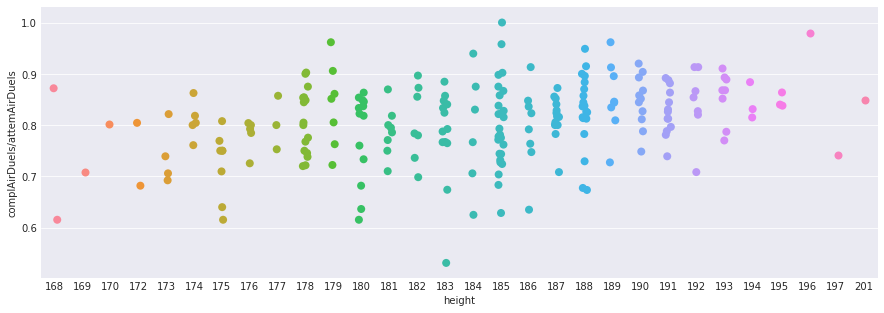

In [175]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.stripplot(x="height",y="complAirDuels/attemAirDuels",data=eng_playersD,size=8,jitter=True,dodge= True)
#sns.set_context(context="notebook",font_scale=1)

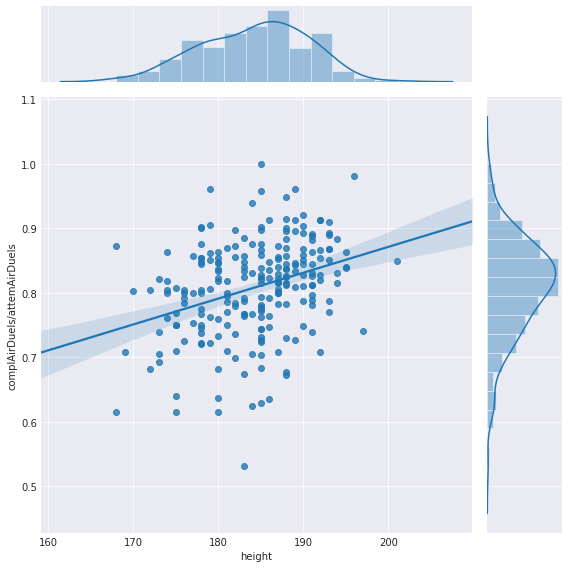

In [176]:
# their distributions and dependecies with regression
sns.jointplot(x="height",y="complAirDuels/attemAirDuels",data=eng_playersD,kind='reg',height=8)


# [RQ6]

### Our goal for this exercise is to produce a table with the players who have done more asists than others

In [153]:
eng_playersA= eng_players.copy()

In [154]:
eng_playersA["Assistcount"]= [0 for _ in range(len(eng_players))]
eng_playersA

,firstName,middleName,lastName,currentTeamId,height,playerId,Assistcount
0,Toby,,Alderweireld,1624,187,36,0
1,Jan,,Vertonghen,1624,189,48,0
2,Christian,,Dannemann Eriksen,1624,180,54,0
3,Johann,,Berg Gu\u00f0munds\u00adson,1646,186,93,0
4,Nacer,,Chadli,1627,187,261,0
...,...,...,...,...,...,...,...
437,Juan Marcos,,Foyth,1624,182,456053,0
438,Aaron,,Wan-Bissaka,1628,183,486252,0
439,Jonathan,,Williams,1628,168,8421,0
440,Jefferson Antonio,,Montero Vite,10531,169,3599,0


In [155]:
for i in range(len(event_England)):
    if ( 301 in event_England.tagsList[i]):
        eng_playersA.loc[eng_players.playerId ==event_England.playerId[i], "Assistcount"]+=1

In [156]:
eng_playersA.sort_values("Assistcount",ascending=False,inplace=True)
eng_playersA

,firstName,middleName,lastName,currentTeamId,height,playerId,Assistcount
24,Kevin,,De Bruyne,1625,181,38021,16
138,Leroy,,San\u00e9,1625,184,245364,13
346,Riyad,,Mahrez,1625,179,26150,10
49,David Josu\u00e9,,Jim\u00e9nez Silva,1625,173,8317,10
63,Raheem Shaquille,,Sterling,1625,170,11066,10
...,...,...,...,...,...,...,...
199,Tom,,Heaton,1646,188,77502,0
197,James,,Morrison,1627,180,8374,0
195,Robert,,Green,1610,191,8544,0
193,Phil,,Jagielka,1623,183,8245,0


In [158]:
Assistdf = eng_playersA[0:11]
Assistdf

,firstName,middleName,lastName,currentTeamId,height,playerId,Assistcount
24,Kevin,,De Bruyne,1625,181,38021,16
138,Leroy,,San\u00e9,1625,184,245364,13
346,Riyad,,Mahrez,1625,179,26150,10
49,David Josu\u00e9,,Jim\u00e9nez Silva,1625,173,8317,10
63,Raheem Shaquille,,Sterling,1625,170,11066,10
71,Bamidele,,Alli,1624,188,13484,9
252,Henrikh,,Mkhitaryan,1609,177,105338,9
2,Christian,,Dannemann Eriksen,1624,180,54,9
301,Pascal,,Gro\u00df,1651,181,15526,8
9,Mesut,,\u00d6zil,1609,180,3319,8


In [160]:
Assistdf.drop(columns={"middleName","currentTeamId","playerId", "height"},inplace=True)

/home/flaminia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
#This is the table we were looking for!!

Assistdf

,firstName,lastName,Assistcount
24,Kevin,De Bruyne,16
138,Leroy,San\u00e9,13
346,Riyad,Mahrez,10
49,David Josu\u00e9,Jim\u00e9nez Silva,10
63,Raheem Shaquille,Sterling,10
71,Bamidele,Alli,9
252,Henrikh,Mkhitaryan,9
2,Christian,Dannemann Eriksen,9
301,Pascal,Gro\u00df,8
9,Mesut,\u00d6zil,8


# [CRQ1]

### What are the time slots of the match with more goals?

#### Here make a dataframe containing for every goal: its Tagslist, its playerId, its teamId, its matchPeriod, its event second and its event minute 

In [29]:
goals=[]

for i in range(len(event_England)):
    if (101 in event_England.tagsList[i] and 1801 in event_England.tagsList[i]):
         goals.append([event_England.tagsList[i], event_England.playerId[i], event_England.teamId[i], event_England.matchPeriod[i], event_England.eventSec[i], event_England.eventMin[i]])

In [105]:
Goals= pd.DataFrame(goals)
Goals.rename(columns = {0:' tagsList', 1:'playerId', 2:'teamId', 3:'matchPeriod', 4:'eventSec', 5 :'eventMin'}, inplace = True)

In [106]:
# And this is what we get
Goals

,tagsList,playerId,teamId,matchPeriod,eventSec,eventMin
0,"[101, 402, 201, 1205, 1801]",25413,1609,1H,94.595788,1.0
1,"[101, 403, 201, 1207, 1801]",14763,1631,1H,254.745027,4.0
2,"[101, 402, 201, 1203, 1801]",12829,1631,1H,1710.855093,28.0
3,"[101, 402, 201, 1203, 1801]",7945,1609,1H,2815.900791,46.0
4,"[101, 403, 201, 1205, 1801]",12829,1631,2H,634.312236,10.0
...,...,...,...,...,...,...
981,"[101, 402, 201, 1206, 1801]",8717,1624,2H,1837.598666,30.0
982,"[101, 401, 201, 1202, 1801]",41174,1633,1H,2287.135376,38.0
983,"[101, 402, 201, 1203, 1801]",14703,1633,2H,1075.868975,17.0
984,"[101, 402, 201, 1206, 1801]",145692,1623,2H,1737.064842,28.0


In [41]:
# We add a new column which show the minute of the goal in an interval of 90' (not of 45')
TotalEventMin=[]

for i in range(len(Goals)):
    if Goals.matchPeriod[i]=="2H":
        TotalEventMin.append(Goals.eventMin[i]+45)
    else:
        TotalEventMin.append(Goals.eventMin[i])

In [42]:
Goals["totalEventMin"]=TotalEventMin

Goals.head()

,tagsList,playerId,teamId,matchPeriod,eventSec,eventMin,totalEventMin
0,"[101, 402, 201, 1205, 1801]",25413,1609,1H,94.595788,1.0,1.0
1,"[101, 403, 201, 1207, 1801]",14763,1631,1H,254.745027,4.0,4.0
2,"[101, 402, 201, 1203, 1801]",12829,1631,1H,1710.855093,28.0,28.0
3,"[101, 402, 201, 1203, 1801]",7945,1609,1H,2815.900791,46.0,46.0
4,"[101, 403, 201, 1205, 1801]",12829,1631,2H,634.312236,10.0,55.0


#### We count in witch interval falls each goal, according to the following table

In [45]:
#interval= 1 ---> 0'-9'
#interval= 2 ---> 9'-18'
#interval= 3 ---> 18'-27'
#interval= 4 ---> 27'-36'
#interval= 5 ---> 36'-45'
#interval= "45+" ---> for the extra time in the 1st period of the match
#interval= 6 ---> 45'-54'
#interval= 7 ---> 54'-63'
#interval= 8 ---> 63'-72'
#interval= 9 ---> 72'-81'
#interval= 10 ---> 81'-90'
#interval= "90+" ---> for the extra time in the 2nd period of the match

interval=[] #the interval of 9 min in which belong every goal


for i in range(len(Goals)):
    if (Goals.matchPeriod[i] == "1H" and Goals.eventMin[i]>45): 
        interval.append("45+")
    elif (Goals.matchPeriod[i] == "2H" and Goals.eventMin[i]>45):
        interval.append('90+')
    else:
        for j in range(1, 11):
            if  (Goals.totalEventMin[i]/ j <= 9)== True :
                interval.append( j)
                break


In [47]:
Goals["interval"]= interval

In [48]:
Goals.head()

,tagsList,playerId,teamId,matchPeriod,eventSec,eventMin,totalEventMin,interval
0,"[101, 402, 201, 1205, 1801]",25413,1609,1H,94.595788,1.0,1.0,1
1,"[101, 403, 201, 1207, 1801]",14763,1631,1H,254.745027,4.0,4.0,1
2,"[101, 402, 201, 1203, 1801]",12829,1631,1H,1710.855093,28.0,28.0,4
3,"[101, 402, 201, 1203, 1801]",7945,1609,1H,2815.900791,46.0,46.0,45+
4,"[101, 403, 201, 1205, 1801]",12829,1631,2H,634.312236,10.0,55.0,7


## i. The barplot with the absolute frequency of goals in all the time slots.

In [49]:
interv=[1,2,3,4,5,"45+",6,7,8,9,10,"90+"]
frequency_g=[]

In [50]:
for el in interv:
    frequency_g.append(len(Goals[Goals.interval== el]))

In [51]:
#frequency of the goals in each interval of time
frequency_g

[77, 79, 81, 73, 97, 13, 110, 106, 100, 110, 104, 36]

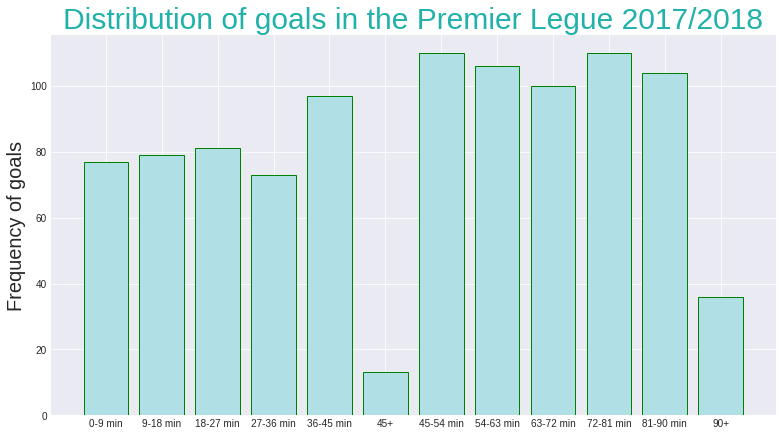

In [108]:
# The Plot

itvs=["0-9 min", "9-18 min","18-27 min","27-36 min","36-45 min","45+","45-54 min","54-63 min","63-72 min","72-81 min","81-90 min", "90+"]
y_pos= [i for i in range(len(interv))]

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(13,7)) 
plt.bar(y_pos, frequency_g,color="powderblue",edgecolor='green')
plt.xticks(y_pos, itvs)
plt.ylabel("Frequency of goals",  fontsize = 20)
plt.title("Distribution of goals in the Premier Legue 2017/2018", loc = 'center', fontsize = 30, fontweight = 3, color = 'lightseagreen')
plt.show()

## ii. Find the top 10 teams that score the most in the interval "81-90".

In [58]:
# Here we count how many goals has done each team in the interval 81-90 min on the whole season

goalperteam=[]

for team in eng:
    goalperteam.append([team, len(Goals[(Goals.teamId== team) &(Goals.interval==10)])])

In [59]:
goalperteam_df= pd.DataFrame(goalperteam, columns=["teamId", "number of goal between 81th and 90th"])

In [60]:
# This is the top 10 required

goalperteam_df.nlargest(10,'number of goal between 81th and 90th')

,teamId,number of goal between 81th and 90th
12,1625,14
18,1611,10
19,1609,9
16,1612,8
9,1644,7
14,1628,7
17,1610,7
3,1659,6
13,1624,6
7,1633,5


## iii. Show if there are players that were able to score at least one goal in 8 different intervals.

In [84]:
# Here for every player ho scored a goal, in a given interval we put an 1 if he has done at least one goal , otherwise we put 0

goalperplayer ={}

for player in Goals.playerId:
            goalperplayer2[player]= [1 if len(Goals[(Goals.playerId == player) &(Goals.interval==el)])>0 else 0 for el in interv]

In [98]:

goalperplayer_df= pd.DataFrame(goalperplayer2).T

goalperplayer_df

,0,1,2,3,4,5,6,7,8,9,10,11
25413,1,1,1,0,0,1,1,0,1,1,1,0
14763,1,0,0,1,0,1,1,0,1,0,0,0
12829,1,1,1,1,1,0,1,1,1,1,1,1
7945,1,0,0,0,1,1,1,0,0,1,0,0
7870,1,1,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8582,0,0,0,0,1,0,0,0,0,0,0,0
8116,0,0,0,0,0,0,0,1,0,0,0,0
286831,0,0,0,0,0,0,1,0,0,0,0,0
222220,0,0,0,0,0,0,0,0,0,0,1,0


In [99]:
# If we sum on each row (on ach player) we can see in how many interval they have done (at least) one goal
goalperplayer_df['tot']=goalperplayer_df.sum(axis=1)

In [100]:
goalperplayer_df

,0,1,2,3,4,5,6,7,8,9,10,11,tot
25413,1,1,1,0,0,1,1,0,1,1,1,0,8
14763,1,0,0,1,0,1,1,0,1,0,0,0,5
12829,1,1,1,1,1,0,1,1,1,1,1,1,11
7945,1,0,0,0,1,1,1,0,0,1,0,0,5
7870,1,1,0,0,0,0,0,1,0,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8582,0,0,0,0,1,0,0,0,0,0,0,0,1
8116,0,0,0,0,0,0,0,1,0,0,0,0,1
286831,0,0,0,0,0,0,1,0,0,0,0,0,1
222220,0,0,0,0,0,0,0,0,0,0,1,0,1


In [103]:
# So since we are looking for the player who scored (at least) one goal in 8 different intervals 

goalperplayer_df[goalperplayer_df.tot == 8 ]

,0,1,2,3,4,5,6,7,8,9,10,11,tot
25413,1,1,1,0,0,1,1,0,1,1,1,0,8
25747,1,1,0,1,1,0,1,1,1,1,0,0,8
15808,1,1,0,1,1,0,1,1,1,0,1,0,8
8422,1,1,1,1,1,0,0,0,1,1,0,1,8


# [CRQ2]
## Visualize movements and passes on the pitch!
Here we try to focus our attention on the zones that a player covers during a match. For each event, we have a pair of coordinates, that are respectively the starting and ending point of that event.

It can be helpful to follow this link: https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

Knowing all the different positions where events happen, let us be able to create different types of visualizations:

## Considering only the match Barcelona - Real Madrid played on the 6 May 2018:

Visualize with a **heatmap** the zones where **Cristiano Ronaldo** was more active.
The events to be considered are: **passes**, **shoots**, **duels**, **free kicks**.

Compare his map with the one of **Lionel Messi**. Comment the results and point out the main differences (we are not looking for deep and technique analysis, just show us if there are some clear differences between the 2 plots).

In [108]:
matches_Spain[matches_Spain.label.str.contains('Barcelona') & matches_Spain.label.str.contains('Real Madrid')]
# MatchId: 2565907

,gameweek,teamsData,dateutc,winner,matchId,label,competitionId,homeTeamId,homeScore,awayScore,awayTeamId,homeWin,homeDraw,homeLoss,awayWin,awayDraw,awayLoss,homePoints,awayPoints
161,17,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",2017-12-23 12:00:00,676,2565711,"Real Madrid - Barcelona, 0 - 3",795,675,0,3,676,0,0,1,1,0,0,0,3
351,36,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",2018-05-06 18:45:00,0,2565907,"Barcelona - Real Madrid, 2 - 2",795,676,2,2,675,0,1,0,0,1,0,1,1


In [109]:
# Events of Barcelona - Real Madrid, 6 May 2018, Camp Nou
events_FCB_RMA = events_Spain[events_Spain.matchId == 2565907 ]
events_FCB_RMA.head()

,eventId,subEventName,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,startPosX,startPosY,endPosX,endPosY,tagsStr,tagsList,eventMin
593455,8,Simple pass,3321,2565907,Pass,675,1H,3.274992,85,249644096,50,49,37,40,1801,[1801],0.0
593456,8,Simple pass,14723,2565907,Pass,675,1H,5.109197,85,249644097,37,40,30,23,1801,[1801],0.0
593457,8,Simple pass,3306,2565907,Pass,675,1H,7.109958,85,249644098,30,23,26,57,1801,[1801],0.0
593458,8,Simple pass,3309,2565907,Pass,675,1H,8.912297,85,249644099,26,57,8,40,1801,[1801],0.0
593459,8,Simple pass,3915,2565907,Pass,675,1H,11.290220,85,249644100,8,40,11,14,1801,[1801],0.0


In [110]:
players[ (players.playerId == 3359 ) | (players.playerId == 3322 ) ]
# Messi 3359
# Ronaldo 3322 (belongs to Juventus Football Club)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,birthArea,playerId,foot,shortName,currentNationalTeamId,roleId,roleName
185,PRT,83,Cristiano Ronaldo,,dos Santos Aveiro,3159,1985-02-05,187,PRT,3322,right,Cristiano Ronaldo,9905,FWD,Forward
207,ESP,72,Lionel Andr\u00e9s,,Messi Cuccittini,676,1987-06-24,170,ARG,3359,left,L. Messi,12274,FWD,Forward


In [111]:
events_Ronaldo = events_FCB_RMA.loc[events_FCB_RMA['playerId'] == 3322]
events_Messi = events_FCB_RMA.loc[events_FCB_RMA['playerId'] == 3359]

In [114]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = plt.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = plt.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = plt.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = plt.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = plt.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")

    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    # Merging all the elements togheter
    element = [Pitch, LeftPenalty, RightPenalty,
               midline, LeftSixYard, RightSixYard, centreCircle,
               centreSpot, rightPenSpot, leftPenSpot,leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

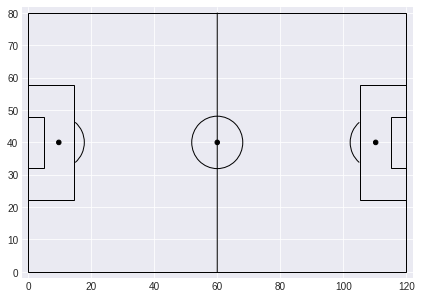

In [116]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
#plt.axis('off')
plt.show()

In [117]:
events_Ronaldo = events_FCB_RMA.loc[events_FCB_RMA['playerId'] == 3322]
events_Messi = events_FCB_RMA.loc[events_FCB_RMA['playerId'] == 3359]

In [118]:
# Ronaldo's Events to consider:
events_Ronaldo['eventName'].unique()

array(['Duel', 'Pass', 'Offside', 'Shot', 'Others on the ball',
       'Free Kick'], dtype=object)

In [119]:
# Messi's Events to consider:
events_Messi['eventName'].unique()

array(['Pass', 'Duel', 'Free Kick', 'Foul', 'Offside',
       'Others on the ball', 'Shot'], dtype=object)

In [120]:
# Passes
ronaldo_passes = events_Ronaldo[(events_Ronaldo['eventName'] == "Pass")]
messi_passes = events_Messi[(events_Messi['eventName'] == "Pass")]

# Duels
ronaldo_duels = events_Ronaldo[(events_Ronaldo['eventName'] == "Duel")]
messi_duels = events_Messi[(events_Messi['eventName'] == "Duel")]

# Free Kicks
ronaldo_freeKicks = events_Ronaldo[(events_Ronaldo['eventName'] == "Free Kick")]
messi_freeKicks = events_Messi[(events_Messi['eventName'] == "Free Kick")]

# Shots
ronaldo_shots = events_Ronaldo[(events_Ronaldo['eventName'] == "Shot")]
messi_shots = events_Messi[(events_Messi['eventName'] == "Shot")]

# Shots
ronaldo_goals = events_Ronaldo[(events_Ronaldo['eventName'] == "Shot") & (events_Ronaldo.tagsStr.str.contains('S101E')) ]
messi_goals = events_Messi[(events_Messi['eventName'] == "Shot") & (events_Messi.tagsStr.str.contains('S101E'))]


In [121]:
ronaldo_passes.columns

Index(['eventId', 'subEventName', 'playerId', 'matchId', 'eventName', 'teamId',
       'matchPeriod', 'eventSec', 'subEventId', 'id', 'startPosX', 'startPosY',
       'endPosX', 'endPosY', 'tagsStr', 'tagsList', 'eventMin'],
      dtype='object')

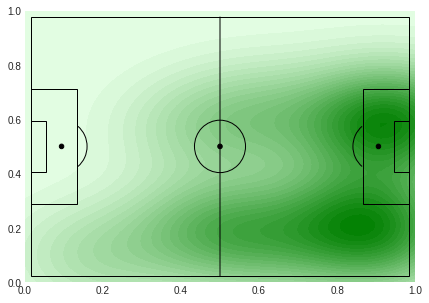

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
#plt.axis('off')

x_coord = [i*1.2 for i in ronaldo_duels["startPosX"]]
y_coord = [i*0.8 for i in ronaldo_duels["startPosY"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", gridsize=100, ax=None, n_levels = 30)
plt.axis('off')
plt.show()


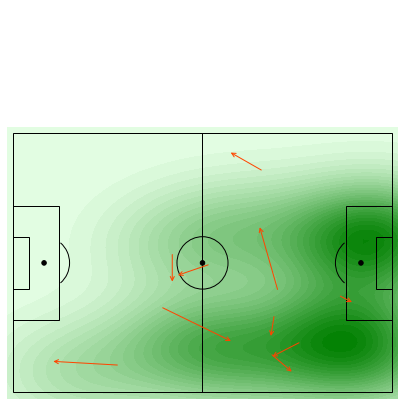

In [124]:
# Arrows
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
    
for i in range(len(ronaldo_passes)):
    # annotate draw an arrow from a startPos to endPos
    ax.annotate("", xy = (ronaldo_passes.iloc[i]['endPosX']*1.2, ronaldo_passes.iloc[i]['endPosY']*1.2), xycoords = 'data',
               xytext = (ronaldo_passes.iloc[i]['startPosX']*1.2, ronaldo_passes.iloc[i]['startPosY']*1.2), textcoords = 'data',
               arrowprops = dict(arrowstyle="->",connectionstyle="arc3", color = "orangered"),)

x_coord = [i*1.2 for i in ronaldo_duels["startPosX"]]
y_coord = [i*0.8 for i in ronaldo_duels["startPosY"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.show()


In [128]:
shots = events_Ronaldo[(events_Ronaldo['eventName'] == "Shot")]
shots.tagsStr.str.contains('S101E').iloc[1]

False

In [127]:
shots.iloc[0]

eventId                             10
subEventName                      Shot
playerId                          3322
matchId                        2565907
eventName                         Shot
teamId                             675
matchPeriod                         1H
eventSec                        419.79
subEventId                         100
id                           249644185
startPosX                           88
startPosY                           14
endPosX                            100
endPosY                            100
tagsStr              402,201,1203,1801
tagsList        [402, 201, 1203, 1801]
eventMin                             6
Name: 593607, dtype: object

In [129]:
[yCord for j, yCord in enumerate(shots["startPosY"]) if 101 in shots.tagsList.iloc[j]]

[51]

In [130]:
def activitiesHeatmap(events_match, playerId, typeHeatMap='simple'): #3322 #3359
    
    events_player = events_match.loc[events_match['playerId'] == playerId]
    
    actions = events_player[(events_player['eventName'] == "Pass") | 
                            (events_player['eventName'] == "Duel") |
                            (events_player['eventName'] == "Shot") |
                            (events_player['eventName'] == "Free Kick")]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')
    
    x_coord = [i*1.2 for i in actions["startPosX"]]
    y_coord = [i*0.8 for i in actions["startPosY"]]
    
    if (typeHeatMap == 'passes') | (typeHeatMap == 'aggregate'):
        passes = events_player[(events_player['eventName'] == "Pass")]
        for i in range(len(passes)):
            color = 'blue' if 1801 in passes.tagsList.iloc[i] else 'red'#red if pass is inaccurate
            # annotate draw an arrow from a startPos to endPos
            ax.annotate("", xy = (passes.iloc[i]['endPosX']*1.2, passes.iloc[i]['endPosY']*0.8), xycoords = 'data',
                       xytext = (passes.iloc[i]['startPosX']*1.2, passes.iloc[i]['startPosY']*0.8), textcoords = 'data',
                       arrowprops = dict(arrowstyle="->",connectionstyle="arc3", color = color),)

    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    
    if typeHeatMap == 'aggregate':
        typeHeatMap = 'shots'
        
    if (typeHeatMap == 'shots') | (typeHeatMap == 'aggregate'):
        shots = events_player[(events_player['eventName'] == "Shot")]
        x_shot = [j*1.2 for j in shots["startPosX"]]
        y_shot = [j*0.8 for j in shots["startPosY"]]
        x_gol = [xCord*1.2 for z, xCord in enumerate(shots["startPosX"]) if 101 in shots.tagsList.iloc[z]]
        y_gol = [yCord*0.8 for z, yCord in enumerate(shots["startPosY"]) if 101 in shots.tagsList.iloc[z]]
        ax.scatter(x_shot, y_shot, c = "blue", label = 'Shot')
        ax.scatter(x_gol, y_gol, c = "gold",label = 'Goal')
        plt.legend(loc='upper right')
    
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)

    return  plt.show()

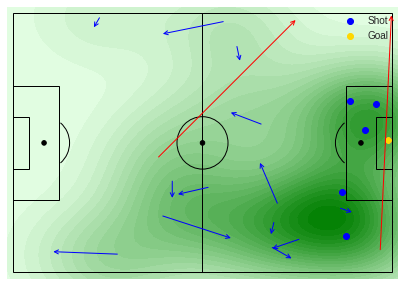

In [131]:
# Cristiano Ronaldo
activitiesHeatmap(events_FCB_RMA, 3322, typeHeatMap='aggregate')

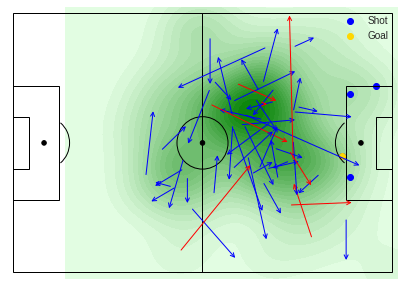

In [132]:
# Leo Messi
activitiesHeatmap(events_FCB_RMA, 3359, typeHeatMap='aggregate')

#### In the aggregated statistics we see the main characteristics of these two phenomenons of the modern foootball: thanks to the big and strong body,  *Cristiano Ronaldo* could cover all the ground, the movents he does all over the ground are foundamental, he has a global impact on the match. Passing the ball  is not one of the most  important characteristics of him: close to the door, he prefers to shot. 
#### One important characteristic we could see from these observations is that he is  always accurate in short passages ( the blue arrows. A red arrow is a non accurate pass).
#### He is an area hunter: his presence in the area is costant, and thanks to this, he scored one goal, being at the right moment in the rigth place.
#### For all these characteristics, Cristiano Ronaldo represent one of the most strong player of the entire century.
#### *Leo Messi* is as dangerous as Cristiano, but his characteristics are completely  different: he cover a precise area in the middle of the ground, and he moves  just when he believes is necessary. He handles a lot of balls: Leo has the capability of doing precise passes inside the opposite team area, from each  part of the ground.
#### He has all the best characteristics of a midfielder and a striker at the same time, but he is not famous for being powerful and resilient in running for a long time.
#### This is clear analyzing data: compared to Cristiano Ronaldo, he covers just the half of the ground. Despite this, Messi has a good balance in passing and shooting when he reaches the area, and all his actions are dangerous, he is impredictable. Thanks to all this, Messi scored one goal at the beginning of the first half.


## Considering only the **match Juventus - Napoli** played on the 22 April 2018:
Visualize with **arrows** the starting point and ending point of each pass done during the match by **Jorginho** and **Miralem Pjanic**. Is there a huge difference between the map with all the passes done and the one with only accurate passes? Comment the results and point out the main differences.

In [134]:
matches_Italy = functions.cleaningMatches(match_Italy)
events_Italy = functions.CleanEngEvents(event_Italy)

In [135]:
# Events of Juventus - Napoli, 22 April 2018, Juventus Stadium
matches_Italy[matches_Italy.label.str.contains('Juventus') & matches_Italy.label.str.contains('Napoli')]
# MatchId: 2576295

,gameweek,teamsData,dateutc,winner,matchId,label,competitionId,homeTeamId,homeScore,awayScore,awayTeamId,homeWin,homeDraw,homeLoss,awayWin,awayDraw,awayLoss,homePoints,awayPoints
148,15,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",2017-12-01 19:45:00,3159,2576105,"Napoli - Juventus, 0 - 1",524,3187,0,1,3159,0,0,1,1,0,0,0,3
331,34,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",2018-04-22 18:45:00,3187,2576295,"Juventus - Napoli, 0 - 1",524,3159,0,1,3187,0,0,1,1,0,0,0,3


In [136]:
events_JUV_NAP = events_Italy[events_Italy.matchId == 2576295 ]

In [137]:
events_JUV_NAP.head()

,eventId,subEventName,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,startPosX,startPosY,endPosX,endPosY,tagsStr,tagsList,eventMin
573095,8,Simple pass,21385,2576295,Pass,3187,1H,1.265726,85,245487374,50,50,38,53,1801,[1801],0.0
573096,8,Simple pass,3300,2576295,Pass,3187,1H,2.087491,85,245487375,38,53,38,52,1801,[1801],0.0
573097,8,High pass,25726,2576295,Pass,3187,1H,3.184110,83,245487376,38,52,82,100,1802,[1802],0.0
573098,5,Ball out of the field,0,2576295,Interruption,3187,1H,7.898538,50,245487378,82,100,100,100,,[],0.0
573099,3,Throw in,20588,2576295,Free Kick,3159,1H,11.326685,36,245487369,17,0,3,35,1801,[1801],0.0


In [138]:
players[ (players.playerId == 20443 ) | (players.playerId == 21315 ) ]
# Miralem Pjanic 20443
# Jorghinho 21315

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,birthArea,playerId,foot,shortName,currentNationalTeamId,roleId,roleName
1482,LUX,74,Miralem,,Pjani\u0107,3159,1990-04-02,180,BIH,20443,right,M. Pjani\u0107,null,MID,Midfielder
1658,ITA,65,Jorge Luiz,,Frello Filho,3187,1991-12-20,180,BRA,21315,right,Jorginho,3757,MID,Midfielder


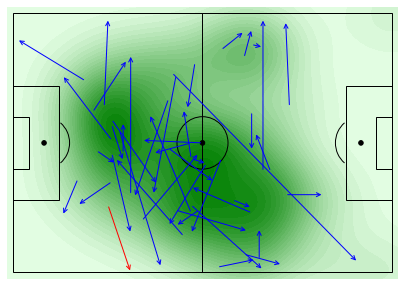

In [139]:
# Miralem Pjanic
activitiesHeatmap(events_JUV_NAP, 20443, typeHeatMap='passes')

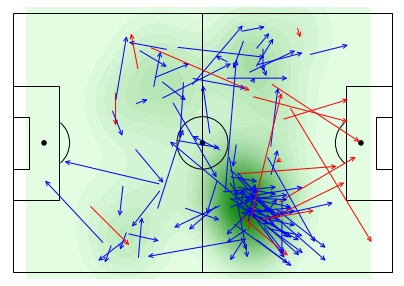

In [140]:
# Jorginho
activitiesHeatmap(events_JUV_NAP, 21315, typeHeatMap='passes')

#### From these heatmaps, we can see how much strong could be *Miralem Pjanic*: he his a complete midfielder, he can do all the different phases in the middle of the ground. His percentage of completed passes is one of the highest between the midfielders. He covers all the ground thanks to his presence and his speed.
#### *Jorginho* has a different way of covering the midfield: he prefers to cover a short area of the ground, and in this area he is a fluidificator in doing short passes with success. He tried to invent interesting actions for the forwards, but any of his passes reached them with success, probabily thanks to the Juventus defense, one of the strongest of the Italian Championship. We have seen also here two different ways for being a great champion.